# Calc Polygons Area

In [ ]:
%pip install numpy matplotlib

In [43]:
from dataclasses import dataclass
from typing import List, Tuple, Union
import numpy as np


@dataclass
class Point2D:
    x: float
    y: float

    def __repr__(self):
        return f'Point2D<{self.x},{self.y}>'

PointPair = Union[Tuple[float, float], Point2D]

class Polygon:
    @staticmethod
    def _is_valid_tuple(obj) -> bool:
        return isinstance(obj, tuple) \
            and len(obj) == 2 \
            and all(isinstance(value, float) or isinstance(value, int) for value in obj)

    def __init__(self, points: List[PointPair]):
        vertices = []
        for point in points:
            if isinstance(point, Point2D):
                vertices.append((point.x, point.y))
            elif Polygon._is_valid_tuple(point):
                vertices.append(point)
            else:
                raise TypeError(f"Expected tuple of 2 floats or Point2D, got {type(point)}")
        self._vertices = np.array(vertices)

    @property
    def n(self) -> int:
        return self._vertices.size

    @property
    def points(self) -> List[Point2D]:
        return [Point2D(x, y) for x, y in self._vertices]

    @property
    # extract x and y values using array indexing
    def coordinates(self) -> Tuple[np.ndarray[float],np.ndarray[float]]:
        return self._vertices[:, 0], self._vertices[:, 1]

    def calc_area(self) -> float:
        # Shift the vertices so that v[i] is paired with v[i+1] in the dot product
        v_shifted = np.roll(self._vertices, -1, axis=0)

        # Compute the cross product of each pair of adjacent vertices
        cross_product = np.cross(self._vertices, v_shifted)

        # Compute the area of the polygon as half the sum of the cross products
        return abs(0.5 * np.sum(cross_product))

    def __repr__(self):
        return f'Polygon <{self.n} vertices polygon>'


Now we instantiate a few polygon objects to play with:

x=array([0, 1, 2, 3]), y=array([1, 2, 2, 1])


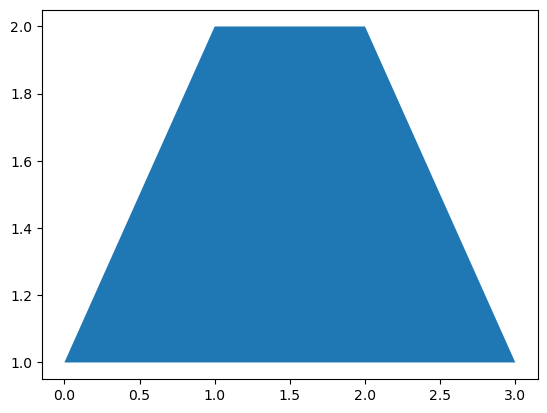

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

trapeze = Polygon([(0, 1), (1, 2), (2, 2), (3, 1)])

# get the x,y vectors
x, y = trapeze.coordinates
print(f'{x=}, {y=}')

# create a new figure and axes object
fig, ax = plt.subplots()

# plot the polygon using the x and y values
ax.fill(x, y)

# show the plot
#plt.show()

In [45]:
# Calculating Polygon Area
print("Area = ", trapeze.calc_area())

Area =  2.0


Area =  3.0


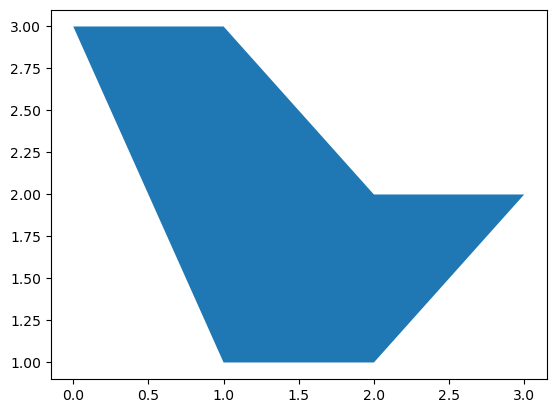

In [46]:
bird = Polygon([(0, 3), (1, 3), (2, 2), (3, 2), (2, 1), (1, 1)])
_, ax = plt.subplots()
ax.fill(*bird.coordinates)
print("Area = ", bird.calc_area())

Area =  14.5


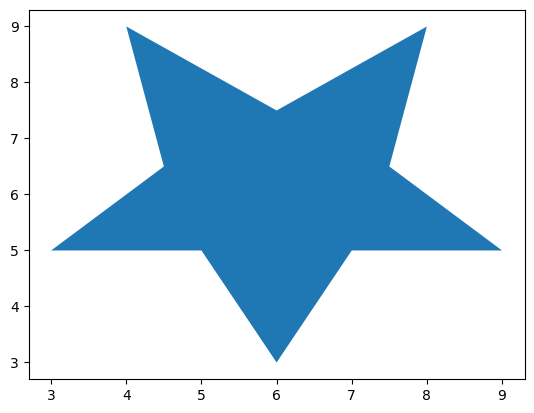

In [47]:
star = Polygon([
        (6, 3),
        (7, 5),
        (9, 5),
        (7.5, 6.5),
        (8, 9),
        (6, 7.5),
        (4, 9),
        (4.5, 6.5),
        (3, 5),
        (5, 5),
    ])
_, ax = plt.subplots()
ax.fill(*star.coordinates)
print("Area = ", star.calc_area())